In [2]:
import tifffile as tiff
import numpy as np
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
in_file = "data/test1.tif"

In [4]:
with tiff.TiffFile(in_file) as tif:
    images = tif.asarray()
    metadata = tif[0].tags

In [5]:
images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

In [32]:
df = pd.DataFrame({"chan1":images[0].flatten(), "chan2":images[1].flatten()}, )

In [33]:
df[df == 0] = np.nan

In [35]:
df = df - 10000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000028872828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000022BC2BE0>]], dtype=object)

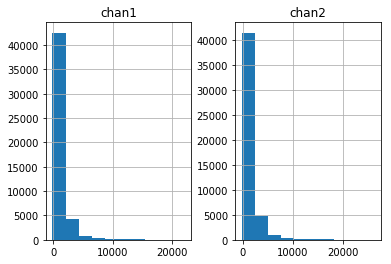

In [36]:
df.hist()

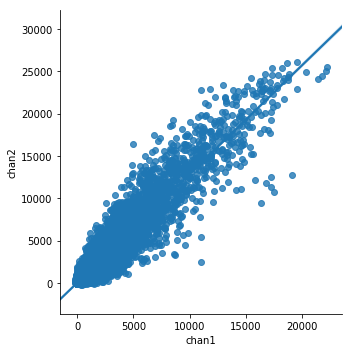

In [39]:
sns.lmplot(x = 'chan1', y = 'chan2', data = df)

In [42]:
df.corr()

,chan1,chan2
chan1,1.000000,0.941555
chan2,0.941555,1.000000


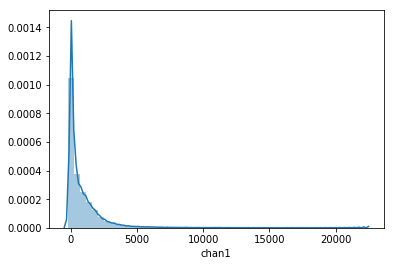

In [44]:
sns.distplot(df["chan1"].dropna(), )